Standard Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

### Task 1: About the Data
***

![Alt text](https://farm4.staticflickr.com/3585/3299226824_4637597b74_z_d.jpg "Cards by bl0ndeeo2, Creative Commons License (https://flic.kr/p/62xpc7) ")

The [dataset](http://archive.ics.uci.edu/ml/datasets/Poker+Hand) we'll be exploring in this post is the Poker Hand data from the UCI Machine Learning Repository.

Each record in the dataset is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. The target column describes the hand, with the possibilities being:    

    0: Nothing in hand; not a recognized poker hand     
    1: One pair; one pair of equal ranks within five cards     
    2: Two pairs; two pairs of equal ranks within five cards     
    3: Three of a kind; three equal ranks within five cards     
    4: Straight; five cards, sequentially ranked with no gaps     
    5: Flush; five cards with the same suit     
    6: Full house; pair + different rank three of a kind     
    7: Four of a kind; four equal ranks within five cards     
    8: Straight flush; straight + flush     
    9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush     
    
The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (one for each suit).

In [4]:
df = pd.read_csv('/content/drive/My Drive/WorkSpace/Poker/data/poker-hand-testing.data')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


### Task 2: Separate the Data into Features and Targets
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [6]:
df.columns = ['first_suit', 'first_rank','second_suit','second_rank', 'third_suit', 'third_rank', 'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch','one_pair', 'two_pair','three_of_a_kind', 'straight', 'flush', 'full_house', 'four_of_a_kind','straight_flush', 'royal_flush']


x = df.iloc[:,0:9]
y = df.hand

In [8]:
df.head()

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


### Task 3: Evaluating Class Balance
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

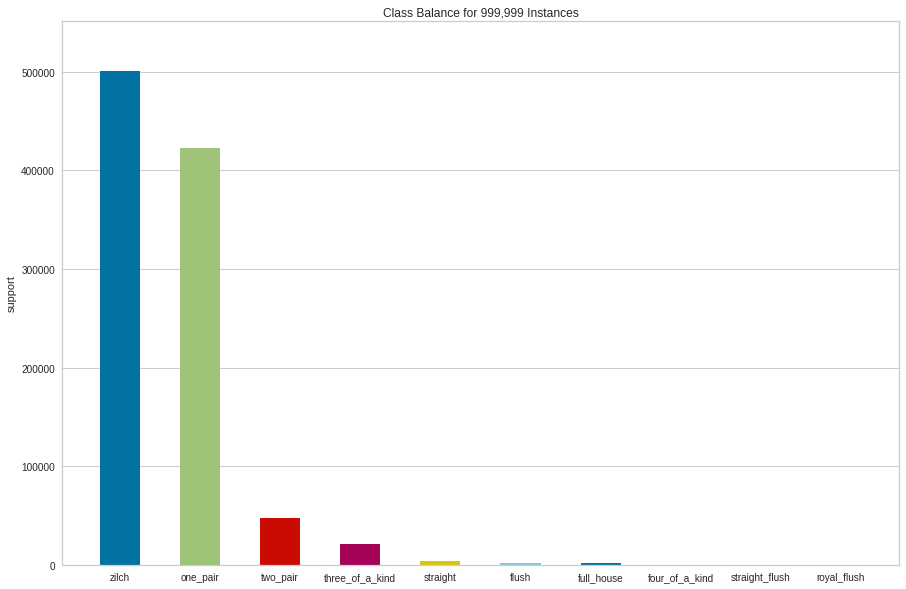

In [10]:
from yellowbrick.classifier import ClassBalance, ClassificationReport, ClassPredictionError, ROCAUC

balance = ClassBalance(size =(1080,720), labels=labels)

balance.fit(y)
balance.poof()



### Task 4: Upsampling from Minority Classes
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [11]:
df.loc[df['hand'] >=5,'hand'] = 5
y = df.hand

labels= ['zilch','one_pair', 'two_pair','three_of_a_kind', 'straight', 'flush']

### Task 5: Training the Random Forests Classifier
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

clf = RandomForestClassifier(n_estimators=100,
                            class_weight= 'balanced',
                            n_jobs=-1)

clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

### Task 6: Classification Accuracy
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [15]:
ypred = clf.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ypred, ytest)

0.6771933333333333

## ROC Curve and AUC

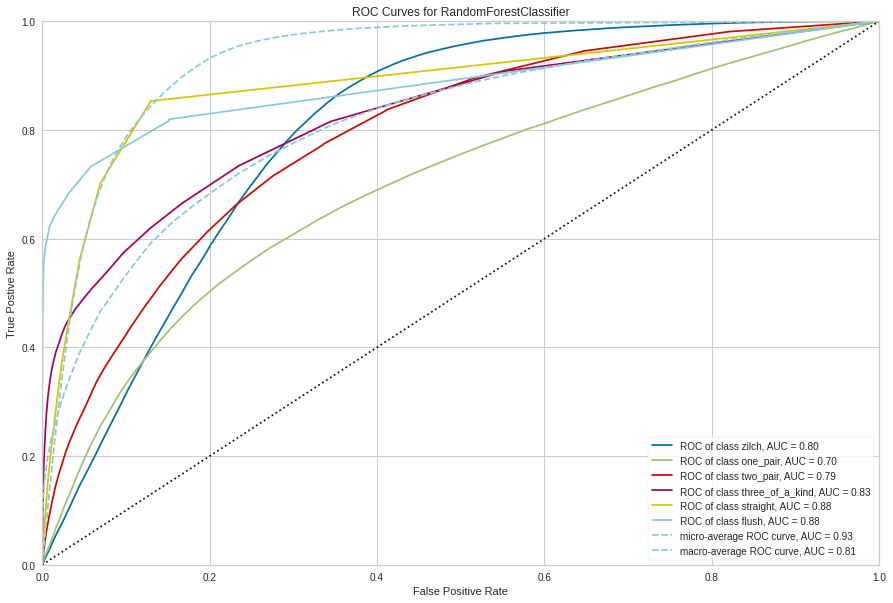

In [16]:
rocauc = ROCAUC(clf, size = (1080, 720), classes= labels)
rocauc.score(xtest, ytest)
rocauc.poof()

 ### Task 8: Classification Report Heatmap
 ***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

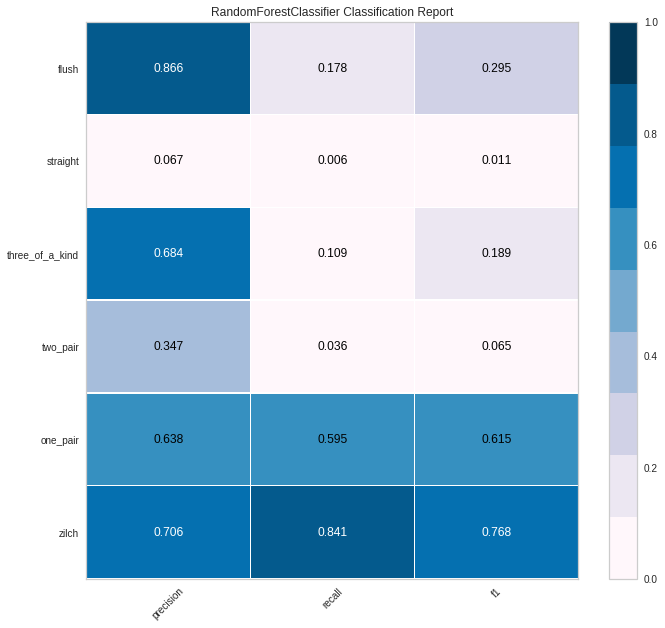

In [17]:
report = ClassificationReport(clf, size = (720, 640), classes= labels, cmap= 'PuBu')
report.score(xtest, ytest)
report.poof()

### Task 9: Class Prediction Error
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

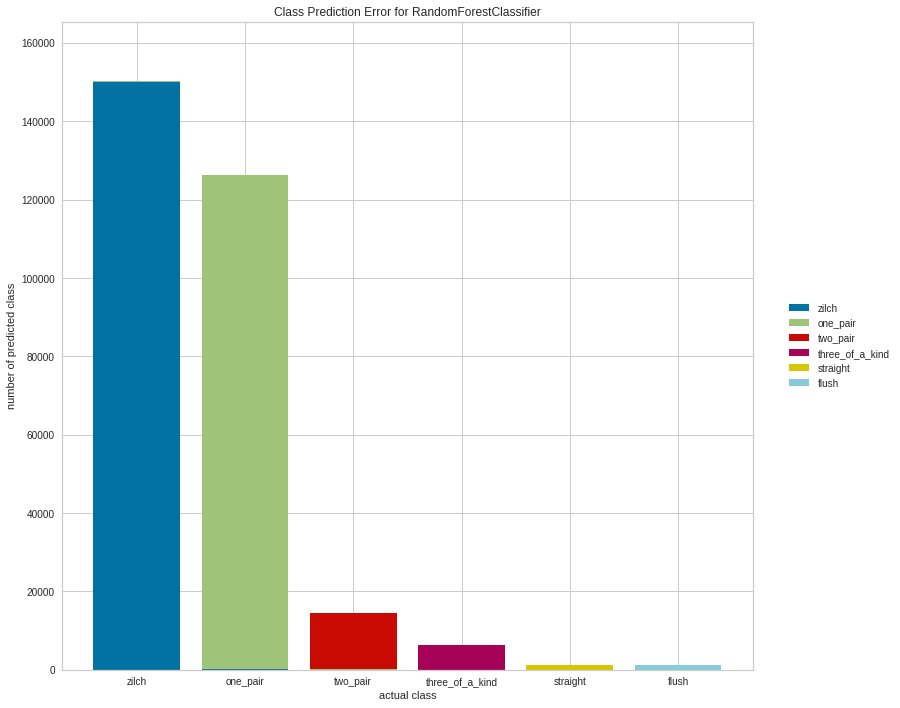

In [19]:
error = ClassPredictionError(clf, size = (1080, 720),classes= labels)

error.score(xtest, ytest)

error.poof()